In [175]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
gdp_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita')

In [92]:
gdp_df = gdp_df[2]

In [93]:
gdp_df.head()

,Rank,Country/Territory,Int$
0,1,Qatar,130475.0
1,—,Macau,116808.0
2,2,Luxembourg,106705.0
3,3,Singapore,100345.0
4,4,Brunei,79530.0


In [3]:
homicide_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_intentional_homicide_rate')

In [14]:
homicide_df = homicide_df[2]

In [23]:
homicide_df.head()

,"Country (or dependent territory, subnational area, etc.)",Region,Subregion,Rate,Count,Yearlisted,Source
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Burundi,Africa,Eastern Africa,6.02,635.0,2016.0,CTS/SDG
2,Comoros,Africa,Eastern Africa,7.70,60.0,2015.0,WHO Estimate
3,Djibouti,Africa,Eastern Africa,6.48,60.0,2015.0,WHO Estimate
4,Eritrea,Africa,Eastern Africa,8.04,390.0,2015.0,WHO Estimate


In [8]:
religion_df = pd.read_html('https://en.wikipedia.org/wiki/Importance_of_religion_by_country')

In [15]:
religion_df = religion_df[1]

In [24]:
religion_df.head()

,Country,"Yes, important[1]","No, unimportant[1]"
0,Estonia,16%,78%
1,Sweden,17%,82%
2,Denmark,19%,80%
3,Norway[a],21%,78%
4,Czech Republic[a],21%,75%


In [141]:
happiness_df = pd.read_html('https://en.wikipedia.org/wiki/World_Happiness_Report#2018_World_Happiness_Report')

In [147]:
happiness_df = happiness_df[4]

In [148]:
happiness_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [150]:
country_df = gdp_df

In [151]:
country_df = country_df.merge(homicide_df, left_on='Country/Territory', right_on='Country (or dependent territory, subnational area, etc.)')

In [152]:
country_df = country_df.merge(religion_df, left_on='Country/Territory', right_on='Country')

In [154]:
country_df = country_df.merge(happiness_df, left_on='Country/Territory', right_on='Country or region')

In [155]:
country_df.head()

,Rank,Country/Territory,Int$,"Country (or dependent territory, subnational area, etc.)",Region,Subregion,Rate,Count,Yearlisted,Source,...,"No, unimportant[1]",Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Qatar,130475.0,Qatar,Asia,Western Asia,0.38,9.0,2014.0,UNSDC/MD,...,4%,32,Qatar,6.374,1.649,1.303,0.748,0.654,0.256,0.171
1,2,Luxembourg,106705.0,Luxembourg,Europe,Western Europe,0.30,2.0,2017.0,EUR/UNECE/CTS,...,59%,17,Luxembourg,6.910,1.576,1.520,0.896,0.632,0.196,0.321
2,3,Singapore,100345.0,Singapore,Asia,South-Eastern Asia,0.20,11.0,2017.0,UNSDC/NP/CTS,...,29%,34,Singapore,6.343,1.529,1.451,1.008,0.631,0.261,0.457
3,5,Ireland,78785.0,Ireland,Europe,Northern Europe,0.90,41.0,2017.0,NP/NSO/CTS,...,46%,14,Ireland,6.977,1.448,1.583,0.876,0.614,0.307,0.306
4,7,United Arab Emirates,69382.0,United Arab Emirates,Asia,Western Asia,0.50,44.0,2017.0,CTS,...,8%,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,NaN


In [122]:
country_df = country_df.set_index('Country')

In [156]:
country_df = country_df.rename(columns={'Int$': 'GDP', 'Yes, important[1]': 'Religion', 'Rate': 'Homicide', 'Score': 'Happiness'})

In [185]:
X = country_df.loc[:, ['GDP', 'Religion', 'Homicide', 'Happiness']]

In [186]:
X.head()

,GDP,Religion,Homicide,Happiness
0,130475.0,95%,0.38,6.374
1,106705.0,39%,0.30,6.910
2,100345.0,70%,0.20,6.343
3,78785.0,54%,0.90,6.977
4,69382.0,91%,0.50,6.774


In [187]:
X['GDP'] = pd.to_numeric(X['GDP'], errors='coerce')

In [188]:
X['sqrt GDP'] = X['GDP']**.5

In [189]:
X['Religion'] = X['Religion'].str.rstrip('%').astype('float')

In [191]:
X = X.dropna()

In [192]:
X=(X-X.mean())/X.std()

In [193]:
y = X['Happiness']

In [194]:
X = X.drop(columns=['Homicide', 'Happiness', 'GDP'])

In [198]:
X.head()

,Religion,sqrt GDP
0,0.852815,3.144855
1,-1.467663,2.661712
2,-0.183113,2.523512
3,-0.846106,2.018975
4,0.687067,1.777346


In [195]:
from sklearn import linear_model

In [196]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)


In [197]:
lm.coef_

array([-0.14364128,  0.67903018])

In [137]:
import matplotlib.pyplot as plt

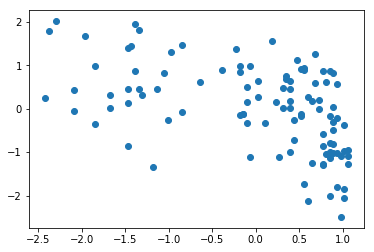

In [173]:
plt.scatter(X['Religion'], y)

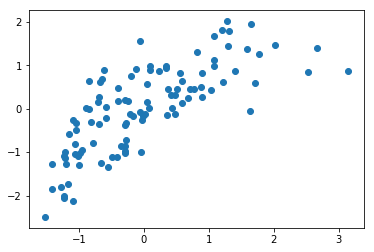

In [199]:
plt.scatter(X['sqrt GDP'], y)